Code to try out forecasting of T as Output and Humidity as Regressor - Using Linear Regression 

In [174]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns




In [175]:
df = pd.read_excel(r'/Users/shailendra0408/Desktop/CSA_Temp.xlsx')
data_array = np.array(df)
print(data_array)
print(df.head())

[[ 12.7  92.  230. ]
 [ 12.7  92.  265. ]
 [ 12.7  91.  300. ]
 ...
 [ 21.8  69.    0. ]
 [ 21.1  73.    0. ]
 [ 20.4  75.    0. ]]
   Temperature  Relative Humidity  Solar Radiation
0         12.7                 92              230
1         12.7                 92              265
2         12.7                 91              300
3         13.0                 91              300
4         13.2                 89              360


In [203]:
T_data, RH_data = data_array[:,0], data_array[:,1]


T_data_train, T_data_test, RH_data_train, RH_data_test = train_test_split(T_data, RH_data, random_state=42, 
                                   test_size=0.25, 
                                   shuffle=True)

T_data_train = T_data_train.reshape(-1,1)
RH_data_train = RH_data_train.reshape(-1,1)
RH_data_test = RH_data_test.reshape(-1,1)
RH_data_train = RH_data_train.reshape(-1,1)

print (RH_data_test, RH_data_train, T_data_test, T_data_train)



[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] [[  0.]
 [ 50.]
 [  0.]
 ...
 [315.]
 [225.]
 [  0.]] [25.3 15.6 21.7 ... 18.9 11.9 14.7] [[15.3]
 [16.1]
 [22. ]
 ...
 [25.2]
 [30.3]
 [22.2]]


In [204]:
model = LinearRegression()
model = LinearRegression().fit(T_data_train, RH_data_train)

In [205]:
r_sq = model.score(T_data_train, RH_data_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.08066447382728659
intercept: [-167.46229654]
slope: [[14.72725104]]


In [206]:
T_data_test = T_data_test.reshape(-1,1)
RelativeH_new_data = model.predict(T_data_test)
RelativeH_new_data

array([[205.13715481],
       [ 62.28281971],
       [152.11905106],
       ...,
       [110.88274815],
       [  7.79199086],
       [ 49.02829377]])

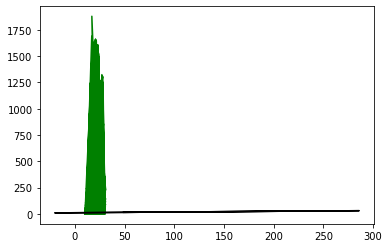

In [207]:
plt.plot(T_data_train,RH_data_train,color='g') 
plt.plot(RelativeH_new_data, T_data_test,color='k') 

plt.show()

/var/folders/b_/bzbh29xx1wgd1q4j08jf5cbr0000gn/T/ipykernel_31830/2527615988.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  g = ax.scatter(x = T_data_train,
/var/folders/b_/bzbh29xx1wgd1q4j08jf5cbr0000gn/T/ipykernel_31830/2527615988.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  g = ax.scatter(x = Temp_new_data,


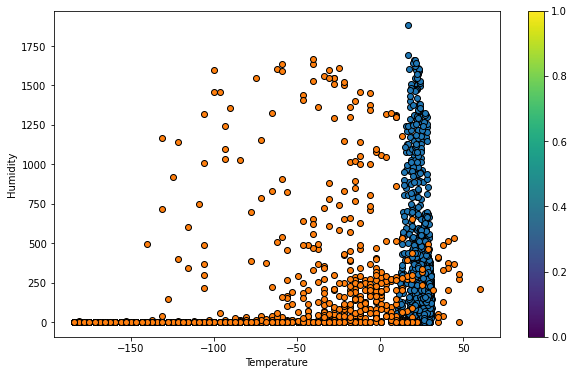

In [208]:
fig, ax = plt.subplots(figsize=(10, 6))
g = ax.scatter(x = T_data_train, 
               y = RH_data_train,
               cmap = "magma",
               vmin=0, vmax=10000,
               edgecolors = 'black')

g = ax.scatter(x = Temp_new_data,
                y = RH_data_test,
                cmap = "magma",
               vmin=0, vmax=10000,
               edgecolors = 'black')

fig.colorbar(g)

plt.xlabel("Temperature")
plt.ylabel("Humidity")
 
plt.show()